# Import necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import networkx as nx
from wordcloud import WordCloud
import squarify
import numpy as np
from scipy.stats import gaussian_kde
from bokeh.plotting import figure, output_notebook, show
from bokeh.layouts import gridplot
from bokeh.io import push_notebook
import folium
import statsmodels.api as sm
from matplotlib_venn import venn2
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [4]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Show first few rows of the dataset

In [5]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Basic Charts

# 1. Bar Chart

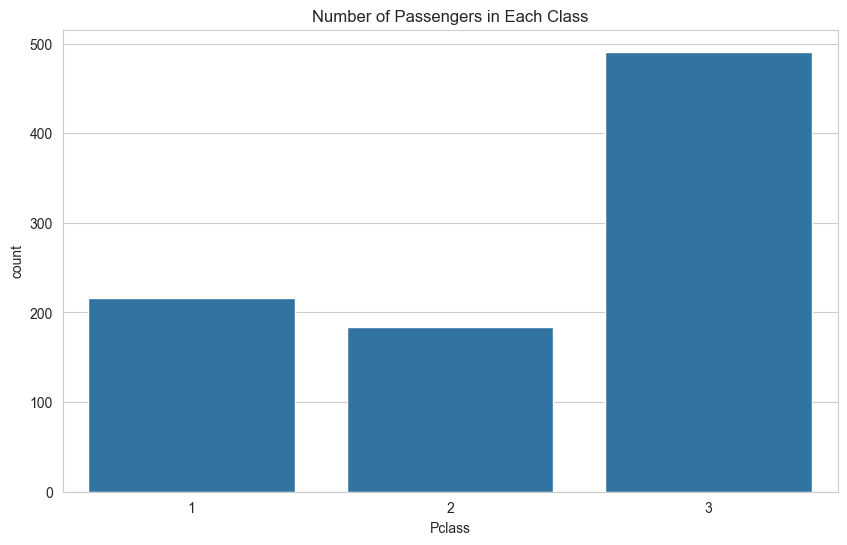

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pclass')
plt.title('Number of Passengers in Each Class')
plt.show()

# 2. Line Chart

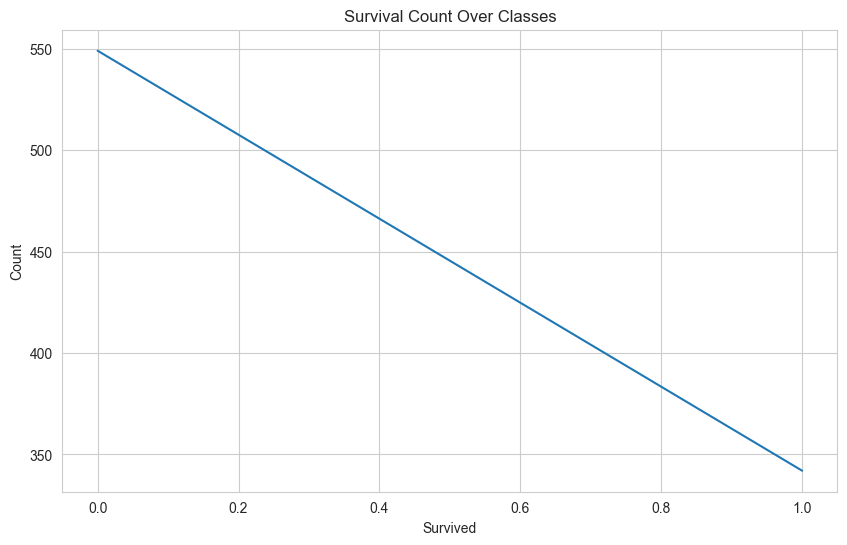

In [7]:
df['Survived'].value_counts().sort_index().plot(kind='line', figsize=(10, 6))
plt.title('Survival Count Over Classes')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# 3. Pie Chart

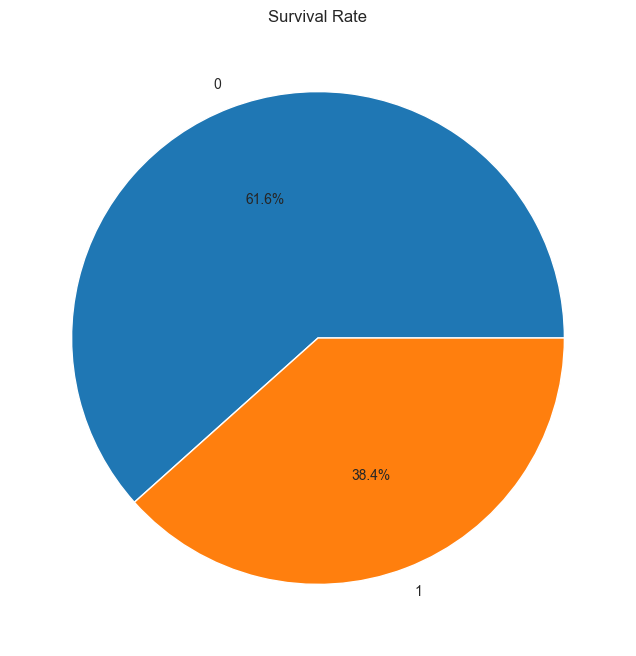

In [8]:
df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Survival Rate')
plt.ylabel('')
plt.show()

# 4. Scatter Plot

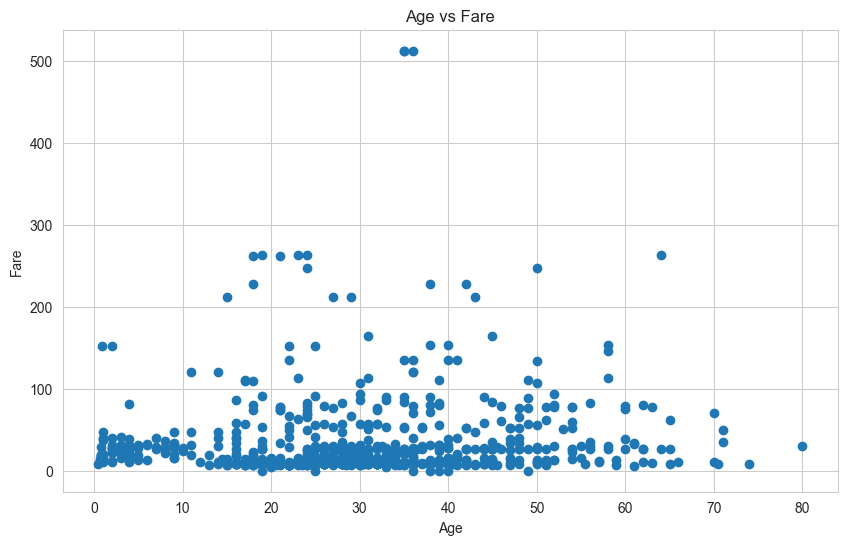

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Fare'])
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# 5. Histogram

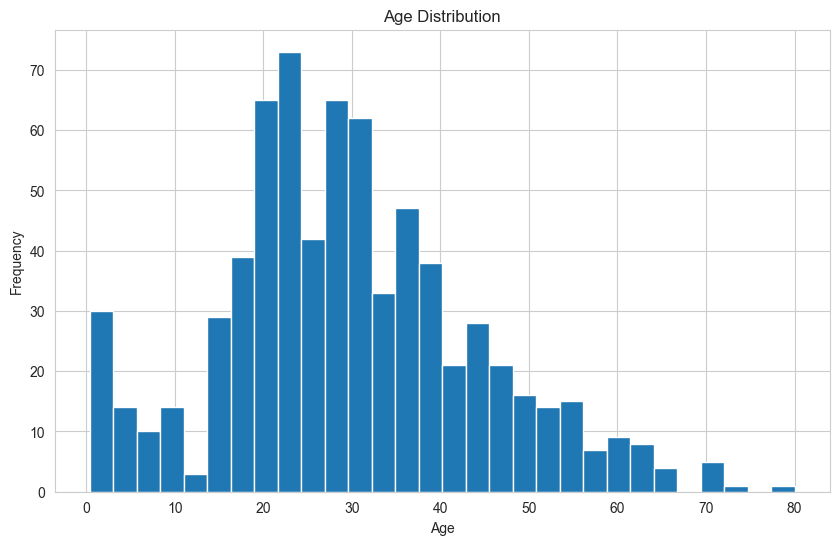

In [10]:
plt.figure(figsize=(10, 6))
df['Age'].plot(kind='hist', bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Advanced Charts

# 6. Box Plot

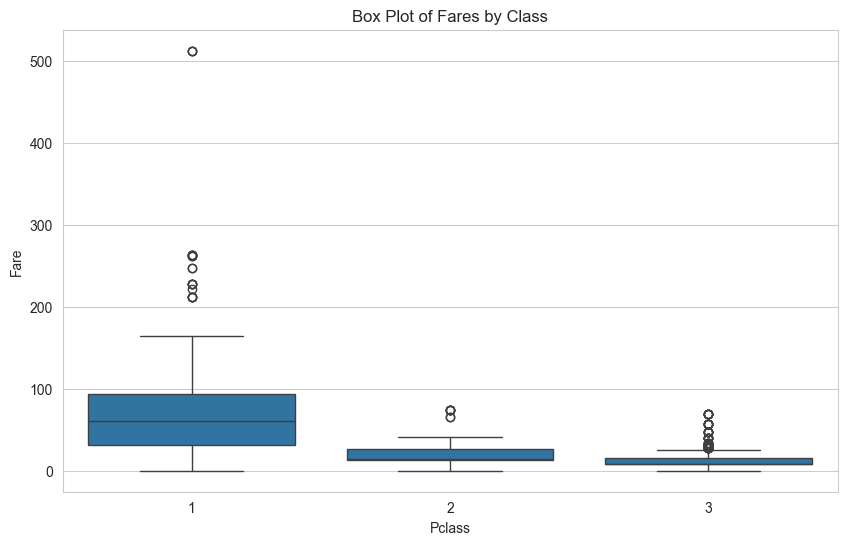

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title('Box Plot of Fares by Class')
plt.show()

# 7. Heatmap

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 1000x600 with 0 Axes>

# 8. Area Chart

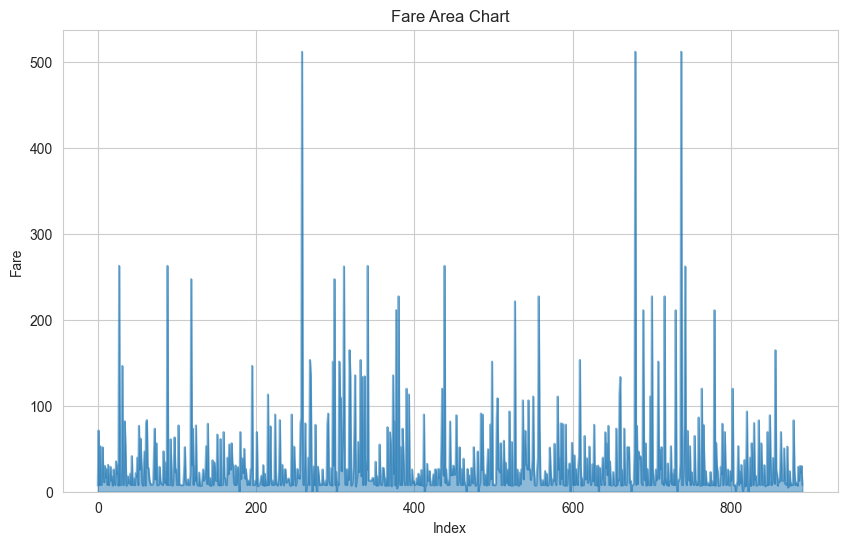

In [13]:
df['Fare'].plot(kind='area', figsize=(10, 6), alpha=0.5)
plt.title('Fare Area Chart')
plt.xlabel('Index')
plt.ylabel('Fare')
plt.show()

# 9. Sankey Diagram

In [14]:
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=["1st Class", "2nd Class", "3rd Class", "Survived", "Not Survived"],
        color=["blue", "green", "red", "yellow", "purple"]
    ),
    link=dict(
        source=[0, 1, 2, 0, 1, 2],
        target=[3, 3, 3, 4, 4, 4],
        value=[85, 17, 119, 80, 14, 372]
    )
))
fig.update_layout(title_text="Sankey Diagram", font_size=10)
fig.show()

# 10. Radar Chart (Spider Chart)

In [15]:
categories = ['Pclass', 'Age', 'Fare', 'Survived']
values = df[categories].mean().values.flatten().tolist()
values += values[:1]
categories += categories[:1]
fig = go.Figure(data=go.Scatterpolar(r=values, theta=categories, fill='toself'))
fig.update_layout(polar=dict(radialaxis=dict(visible=True)), showlegend=False)
fig.show()

# 11. Network Graph

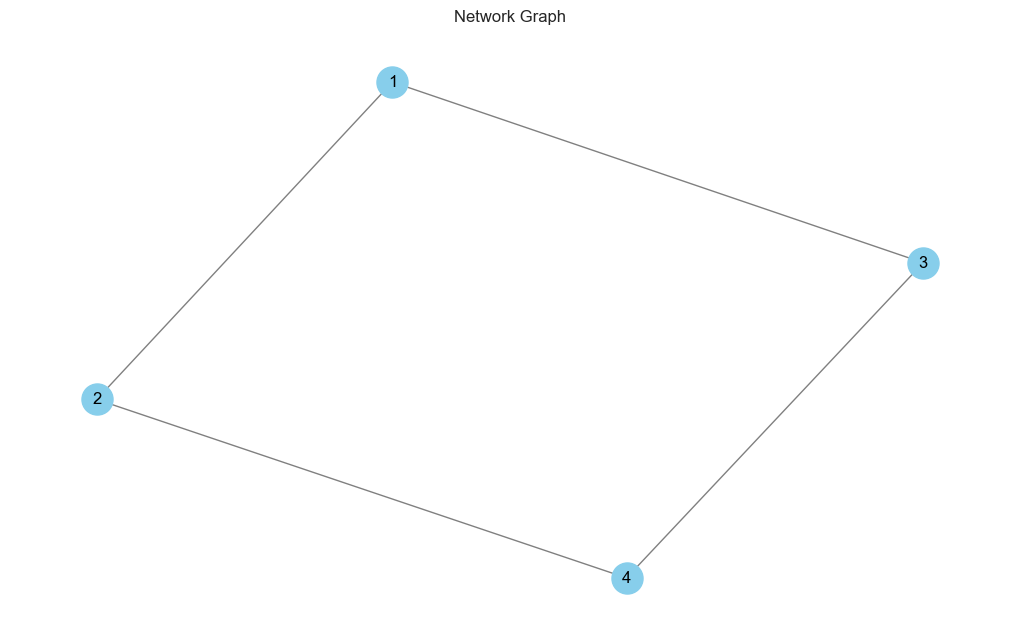

In [16]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4)])
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray')
plt.title('Network Graph')
plt.show()

# 12. Donut Chart

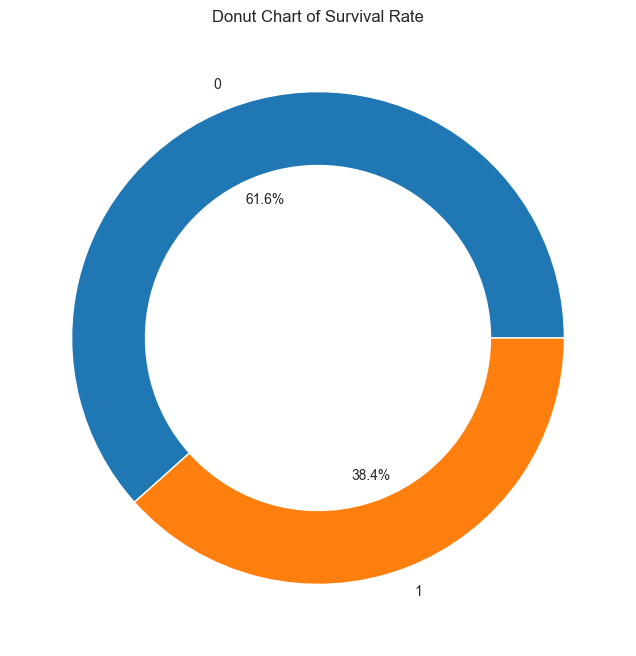

In [17]:
plt.figure(figsize=(8, 8))
df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title('Donut Chart of Survival Rate')
plt.ylabel('')
plt.show()

# 13. Gauge Chart

In [18]:
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=df['Fare'].mean(),
    title={'text': "Average Fare"},
    gauge={'axis': {'range': [None, df['Fare'].max()]}}
))
fig.show()

# 14. Sunburst Chart

In [20]:
fig = px.sunburst(df, path=['Pclass', 'Sex', 'Survived'], values='Fare')
fig.show()

# 15. Hexbin Plot

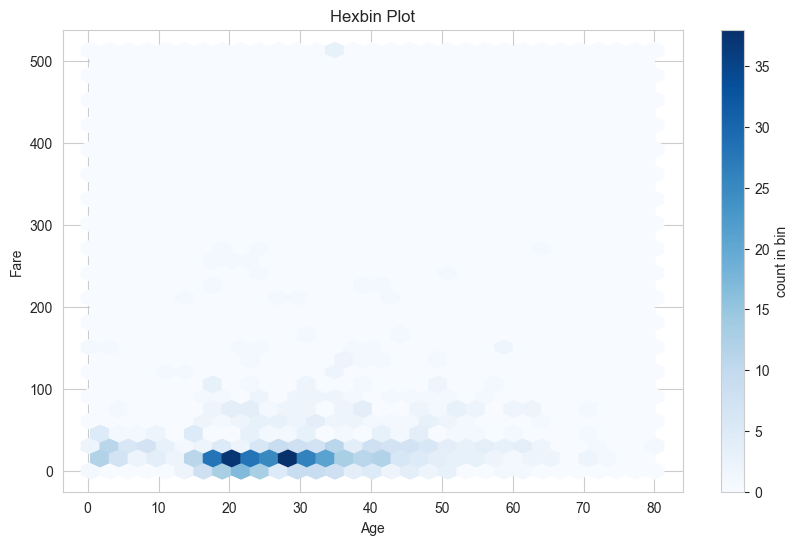

In [21]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['Age'], df['Fare'], gridsize=30, cmap='Blues')
plt.colorbar(label='count in bin')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Hexbin Plot')
plt.show()

# 16. Violin Plot

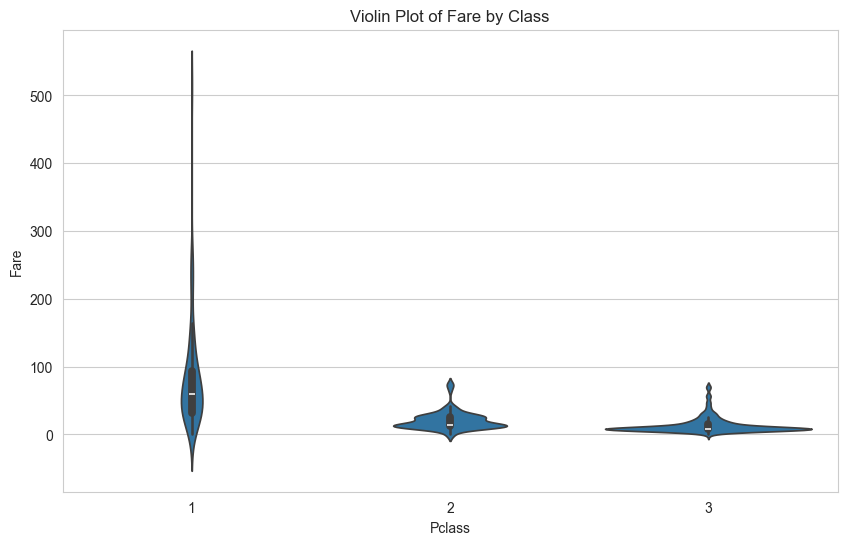

In [22]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Fare', data=df)
plt.title('Violin Plot of Fare by Class')
plt.show()

# 17. Parallel Coordinates

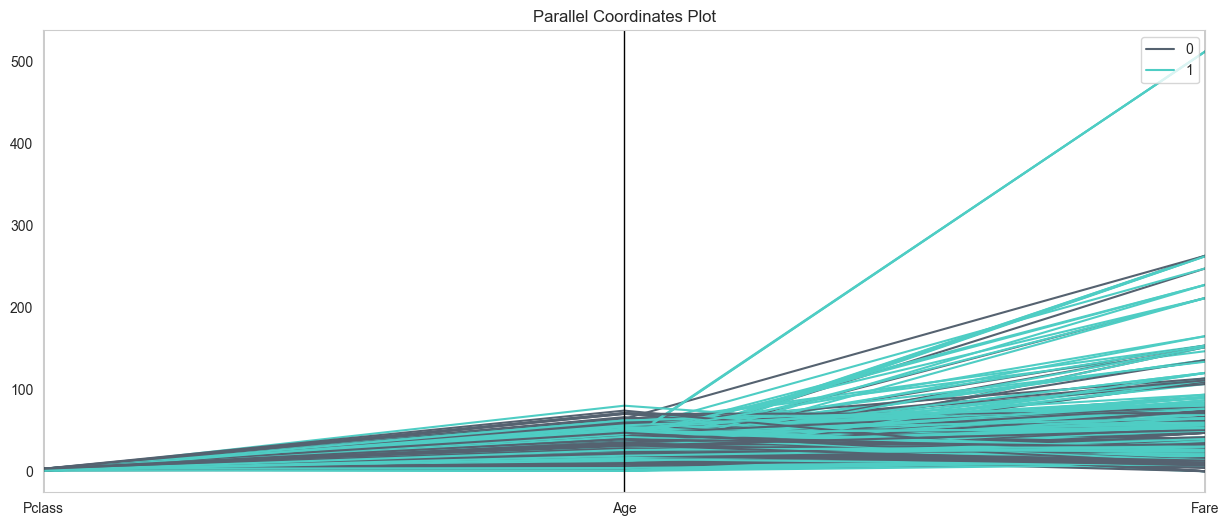

In [23]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15, 6))
parallel_coordinates(df[['Pclass', 'Age', 'Fare', 'Survived']].dropna(), 'Survived', color=('#556270', '#4ECDC4', '#C7F464'))
plt.title('Parallel Coordinates Plot')
plt.show()

# 18. Choropleth Map

In [25]:
# For demonstration, we will use a dataset with geographical data
map_data = pd.DataFrame({
    'City': ['Southampton', 'Cherbourg', 'Queenstown'],
    'Latitude': [50.9078, 49.6456, 51.8493],
    'Longitude': [-1.4044, -1.6221, -8.2997],
    'Passengers': [644, 168, 77]
})
fig = px.scatter_geo(map_data, lat='Latitude', lon='Longitude', color='Passengers',
                     size='Passengers', hover_name='City', projection='natural earth')
fig.update_layout(title='Choropleth Map of Passengers')
fig.show()

# 19. Strip Plot

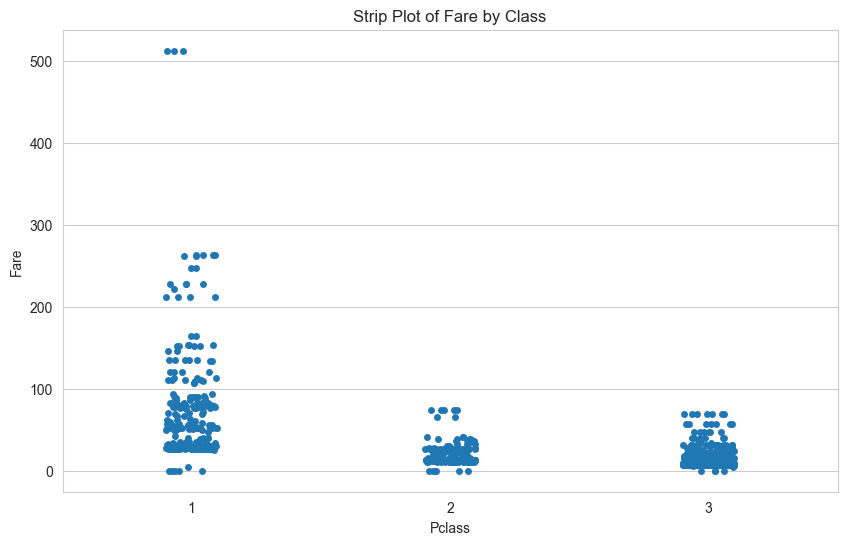

In [27]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='Pclass', y='Fare', data=df)
plt.title('Strip Plot of Fare by Class')
plt.show()

# 20. Swarm Plot

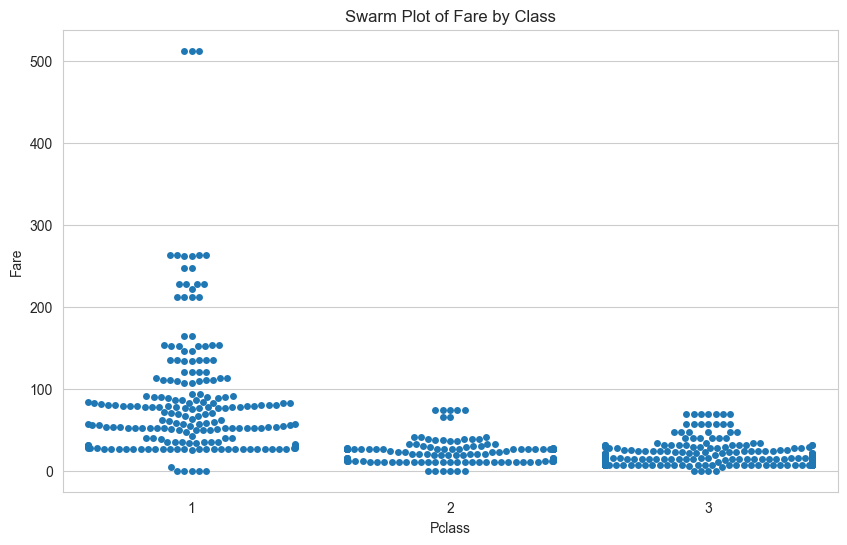

In [28]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Pclass', y='Fare', data=df)
plt.title('Swarm Plot of Fare by Class')
plt.show()

# 3D Visualizations

# 21. 3D Scatter Plot

In [29]:
fig = px.scatter_3d(df, x='Age', y='Fare', z='Pclass', color='Survived')
fig.show()

# 22. 3D Line Plot

In [30]:
# Creating a sample 3D line plot (Titanic dataset doesn't naturally lend itself to 3D line plots)
t = np.linspace(0, 2*np.pi, 100)
x = t
y = np.sin(t)
z = np.cos(t)
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='lines')])
fig.update_layout(title='3D Line Plot')
fig.show()

# 23. 3D Surface Plot

In [31]:
# Creating a sample 3D surface plot (Titanic dataset doesn't naturally lend itself to 3D surface plots)
x = np.outer(np.linspace(-2, 2, 30), np.ones(30))
y = x.copy().T
z = np.cos(x ** 2 + y ** 2)
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='3D Surface Plot')
fig.show()

# 24. 3D Bar Plot

In [32]:
# Plotly does not directly support 3D bar plots like 2D bar plots
fig = go.Figure(data=[go.Scatter3d(x=df['Age'], y=df['Fare'], z=df['Pclass'], mode='markers')])
fig.update_layout(title='3D Scatter Plot (used as an alternative to 3D Bar Plot)')
fig.show()

# Interactive Visualizations (using Plotly, Bokeh, etc.)

# 25. Time Series Plots

In [33]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Age'], y=df['Fare'], mode='markers', name='Fare vs Age'))
fig.update_layout(title='Scatter Plot of Age vs Fare')
fig.show()

# 26. Geographical Maps

In [34]:
map_ = folium.Map(location=[40.7128, -74.0060], zoom_start=2)
for _, row in map_data.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=row['Passengers']/10, color='blue', fill=True, fill_opacity=0.6).add_to(map_)
map_

# 27. Financial Charts

In [36]:
# Using a simple bar chart as an alternative visualization
df_candlestick = df[['Pclass', 'Fare']].groupby('Pclass').mean().reset_index()
fig = px.bar(df_candlestick, x='Pclass', y='Fare')
fig.update_layout(title='Average Fare by Class')
fig.show()

# 28. Gauge Charts with Animations

In [38]:
fig = go.Figure(go.Indicator(
    mode="gauge+number+delta", value=df['Fare'].mean(),
    domain={'x': [0.1, 0.9], 'y': [0.1, 0.9]},
    title={'text': "Average Fare"}
))
fig.update_layout(title='Gauge Chart with Animation')
fig.show()

# 29. Dashboards

In [39]:
from bokeh.layouts import column
output_notebook()
p1 = figure(title='Scatter Plot', x_axis_label='Age', y_axis_label='Fare')
p1.scatter(df['Age'], df['Fare'])
p2 = figure(title='Box Plot', x_axis_label='Pclass', y_axis_label='Fare')
p2.vbar(x=df['Pclass'], top=df['Fare'], width=0.9)
grid = gridplot([[p1, p2]])
show(grid, notebook_handle=True)

Loading BokehJS ...

# Statistical Visualizations

# 30. Kernel Density Estimation (KDE) Plot

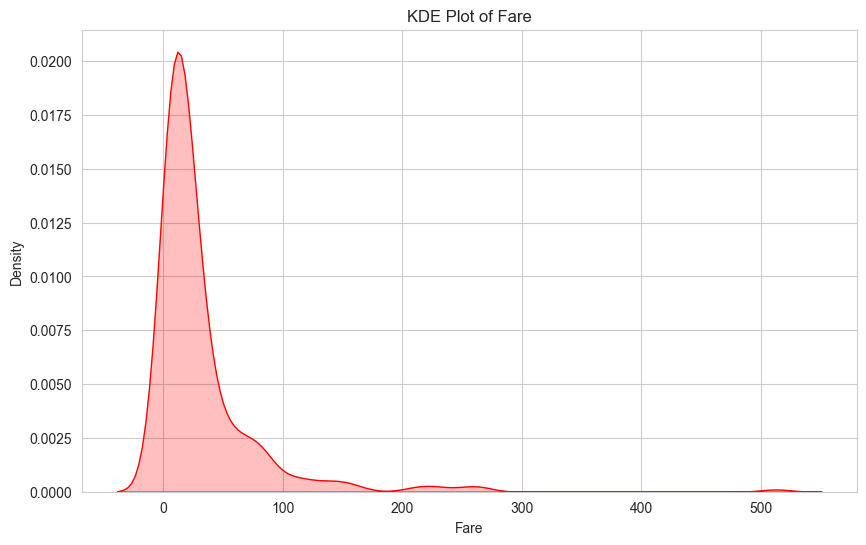

In [40]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Fare'], shade=True, color='r')
plt.title('KDE Plot of Fare')
plt.show()

# 31. QQ Plot (Quantile-Quantile Plot)

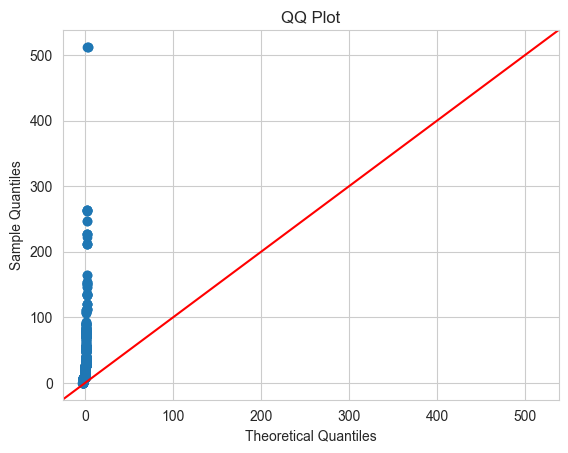

In [41]:
sm.qqplot(df['Fare'], line ='45')
plt.title('QQ Plot')
plt.show()

# 32. Violin Plot (combines boxplot and KDE)

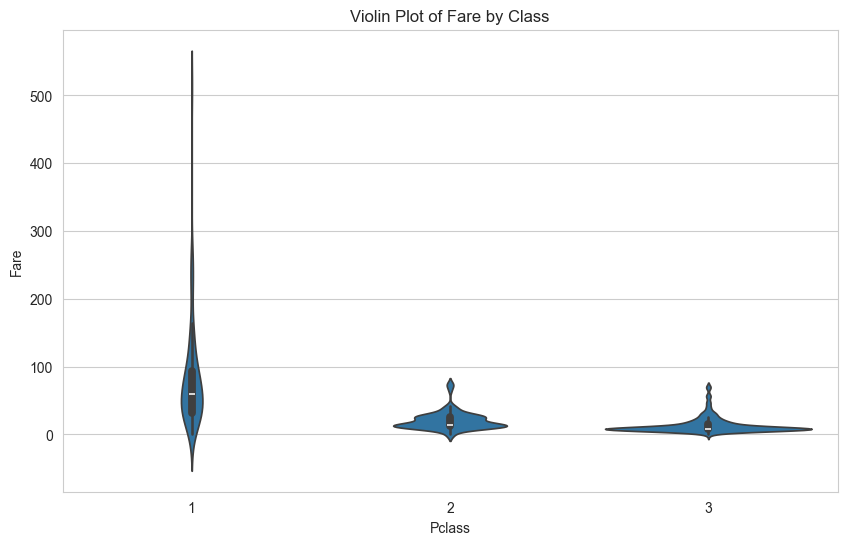

In [42]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Fare', data=df)
plt.title('Violin Plot of Fare by Class')
plt.show()

# 33. Empirical Cumulative Distribution Function (ECDF) Plot

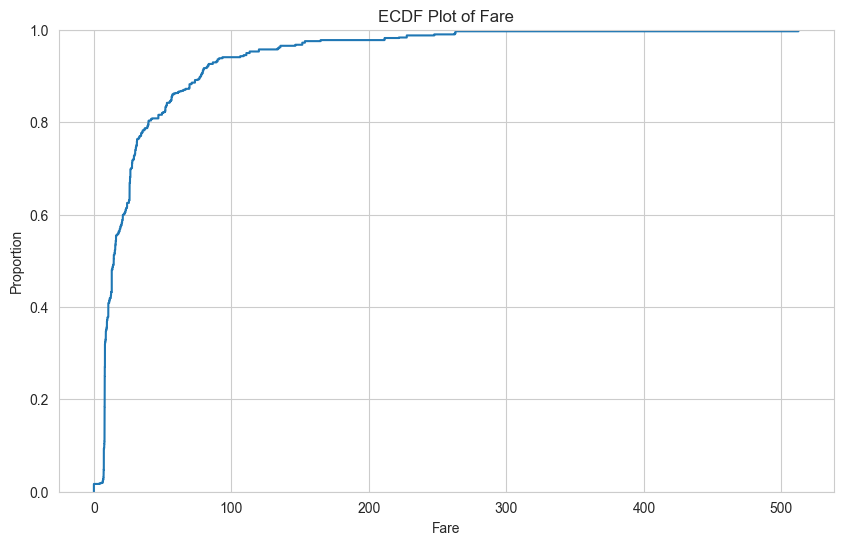

In [43]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(df['Fare'])
plt.title('ECDF Plot of Fare')
plt.show()

# Specialized Visualizations

# 34. Stream Plots (for flow data)

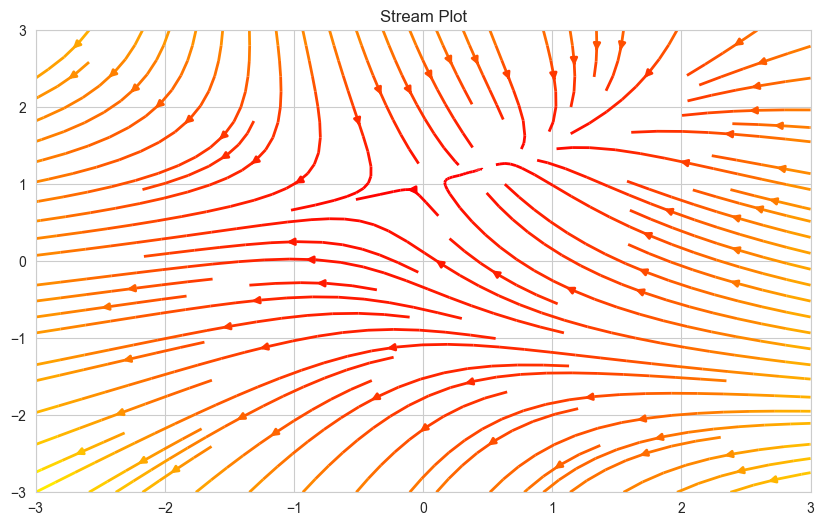

In [45]:
Y, X = np.mgrid[-3:3:100j, -3:3:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
plt.figure(figsize=(10, 6))
plt.streamplot(X, Y, U, V, color=np.sqrt(U**2 + V**2), linewidth=2, cmap='autumn')
plt.title('Stream Plot')
plt.show()

# 35. Venn Diagrams (for set relationships)

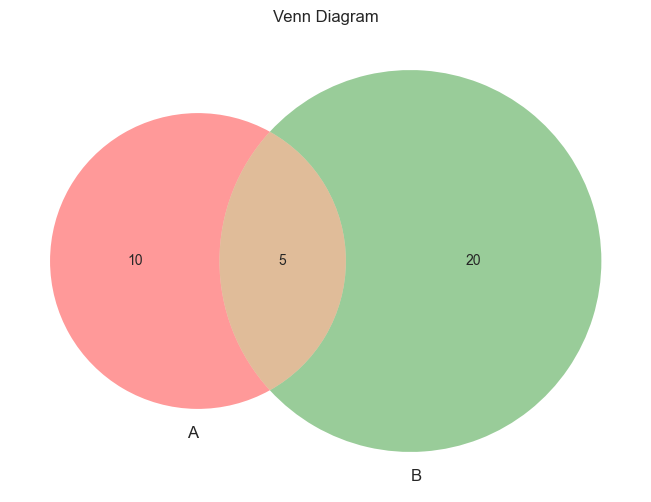

In [46]:
plt.figure(figsize=(10, 6))
venn2(subsets = (10, 20, 5), set_labels = ('A', 'B'))
plt.title('Venn Diagram')
plt.show()

# 36. Gantt Charts (for project scheduling)

In [47]:
# Using another dataset for a Gantt chart example
df_gantt = pd.DataFrame({
    'Task': ['Task 1', 'Task 2', 'Task 3', 'Task 4'],
    'Start': ['2024-01-01', '2024-01-05', '2024-01-10', '2024-01-15'],
    'Finish': ['2024-01-10', '2024-01-15', '2024-01-20', '2024-01-25']
})
df_gantt['Start'] = pd.to_datetime(df_gantt['Start'])
df_gantt['Finish'] = pd.to_datetime(df_gantt['Finish'])
fig = px.timeline(df_gantt, x_start="Start", x_end="Finish", y="Task")
fig.update_yaxes(categoryorder="total ascending")
fig.show()

# 37. Word Clouds (for text analysis)

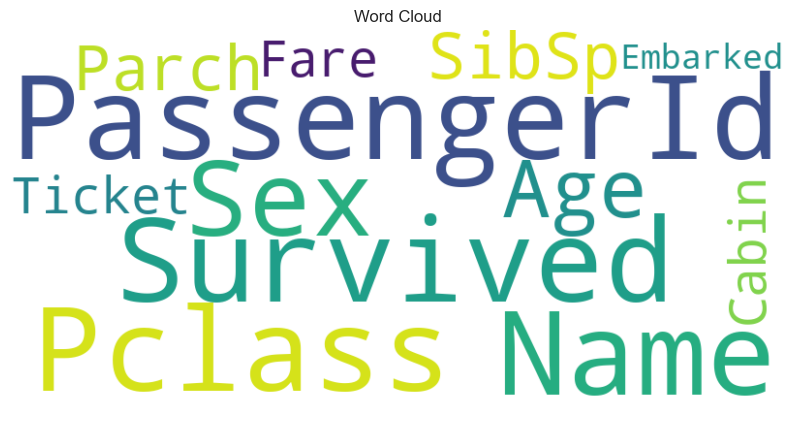

In [48]:
text = " ".join(df.columns)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()